In [25]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
euk = pd.read_csv(tsvFile, sep="\t")
print(euk)

                         Species   Kingdom           Class   Size (Mb)  \
0     Emiliania huxleyi CCMP1516  Protists  Other Protists  167.676000   
1           Arabidopsis thaliana    Plants     Land Plants  119.669000   
2                    Glycine max    Plants     Land Plants  979.046000   
3            Medicago truncatula    Plants     Land Plants  412.924000   
4           Solanum lycopersicum    Plants     Land Plants  828.349000   
...                          ...       ...             ...         ...   
8297    Saccharomyces cerevisiae     Fungi     Ascomycetes    3.993920   
8298    Saccharomyces cerevisiae     Fungi     Ascomycetes    0.586761   
8299    Saccharomyces cerevisiae     Fungi     Ascomycetes   12.020400   
8300    Saccharomyces cerevisiae     Fungi     Ascomycetes   11.960900   
8301    Saccharomyces cerevisiae     Fungi     Ascomycetes   11.820700   

          GC% Number of genes Number of proteins  Publication year  \
0        64.5           38549            

In [27]:

# Replace all "-" values with NaN across the entire DataFrame
euk.replace("-", pd.NA, inplace=True)

# Fill NaN values with the previous row's value for each column
euk.fillna(method='ffill', inplace=True)

# Display the DataFrame after filling
print(euk)

                         Species   Kingdom           Class   Size (Mb)  \
0     Emiliania huxleyi CCMP1516  Protists  Other Protists  167.676000   
1           Arabidopsis thaliana    Plants     Land Plants  119.669000   
2                    Glycine max    Plants     Land Plants  979.046000   
3            Medicago truncatula    Plants     Land Plants  412.924000   
4           Solanum lycopersicum    Plants     Land Plants  828.349000   
...                          ...       ...             ...         ...   
8297    Saccharomyces cerevisiae     Fungi     Ascomycetes    3.993920   
8298    Saccharomyces cerevisiae     Fungi     Ascomycetes    0.586761   
8299    Saccharomyces cerevisiae     Fungi     Ascomycetes   12.020400   
8300    Saccharomyces cerevisiae     Fungi     Ascomycetes   11.960900   
8301    Saccharomyces cerevisiae     Fungi     Ascomycetes   11.820700   

          GC% Number of genes Number of proteins  Publication year  \
0        64.5           38549            

<ipython-input-27-f5493c13329d>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  euk.fillna(method='ffill', inplace=True)


In [28]:
# Q1. How many Mammals have at least 20,000 genes? What are their scientific names?

# Note:
# Mammals are under Class
# Scientific names are under Species
# CODE = >
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'])
filtered_data = euk[(euk['Class'] == 'Mammals') & (euk['Number of genes'] >= 20000)]
desired_column_data = filtered_data['Species']

print(desired_column_data)

44           Homo sapiens
45           Mus musculus
65      Rattus norvegicus
70            Felis catus
74             Bos taurus
              ...        
6781         Mus musculus
7486         Homo sapiens
7487         Homo sapiens
7494         Homo sapiens
7495         Homo sapiens
Name: Species, Length: 192, dtype: object


In [29]:
# Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?
# CODE =>
# Filter the DataFrame for rows where Column1 has the specific value
filtered_df = euk[euk['Kingdom'] == 'Animals']

# Count the occurrences of each unique value in Column2 for the specific value of Column1
count_entries = filtered_df['Class'].value_counts().reset_index()
count_entries.columns = ['Class', 'Count']  # Rename columns for clarity

# Display the result
print(count_entries)

           Class  Count
0        Mammals    658
1        Insects    602
2         Fishes    282
3  Other Animals    210
4          Birds    172
5     Roundworms    162
6      Flatworms     47
7       Reptiles     41
8     Amphibians      7


In [30]:
# Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?
# CODE =>

# Group by Column2 and count the number of unique values in Column3
unique_count = filtered_df.groupby('Class')['Species'].nunique().reset_index()
unique_count.columns = ['unique_class_for_animals', 'Unique_Species_foreach_class']

# Display the result
print(unique_count)

  unique_class_for_animals  Unique_Species_foreach_class
0               Amphibians                             6
1                    Birds                           144
2                   Fishes                           218
3                Flatworms                            34
4                  Insects                           402
5                  Mammals                           313
6            Other Animals                           171
7                 Reptiles                            38
8               Roundworms                           116


In [31]:
# Q4. What are the unique scientific names of Mammals with the genus name Macaca?
filtered_data = euk[euk['Class'] == 'Mammals']
filtered_macaca = filtered_data[filtered_data['Species'].str.contains(r'^Macaca\s', case=False, na=False)]
print(filtered_macaca.Species)

119             Macaca mulatta
306        Macaca fascicularis
1116         Macaca nemestrina
1845    Macaca fuscata fuscata
4856       Macaca fascicularis
4948            Macaca mulatta
5087            Macaca mulatta
5152       Macaca fascicularis
5646            Macaca mulatta
5740            Macaca mulatta
5960            Macaca mulatta
6027            Macaca mulatta
Name: Species, dtype: object


In [32]:
# Q5. Modify the Species names to only contain the scientific names and create a new dataframe.
# Code=>
# Extract the first two parts of the species name
euk['Species_New'] = euk['Species'].str.split().str[0:2].str.join(" ")

# Select the required columns and create a new DataFrame
new_dataframe = euk[['Species_New', 'Kingdom', 'Class', 'Size (Mb)','GC%', 'Number of genes', 'Number of proteins','Publication year','Assembly status']]
df_species = euk[['Species_New', 'Kingdom', 'Class', 'Size (Mb)', 'Number of genes', 'Number of proteins']]

# Display the new DataFrame
print(df_species)

                   Species_New   Kingdom           Class   Size (Mb)  \
0            Emiliania huxleyi  Protists  Other Protists  167.676000   
1         Arabidopsis thaliana    Plants     Land Plants  119.669000   
2                  Glycine max    Plants     Land Plants  979.046000   
3          Medicago truncatula    Plants     Land Plants  412.924000   
4         Solanum lycopersicum    Plants     Land Plants  828.349000   
...                        ...       ...             ...         ...   
8297  Saccharomyces cerevisiae     Fungi     Ascomycetes    3.993920   
8298  Saccharomyces cerevisiae     Fungi     Ascomycetes    0.586761   
8299  Saccharomyces cerevisiae     Fungi     Ascomycetes   12.020400   
8300  Saccharomyces cerevisiae     Fungi     Ascomycetes   11.960900   
8301  Saccharomyces cerevisiae     Fungi     Ascomycetes   11.820700   

      Number of genes Number of proteins  
0               38549              38554  
1               38311              48265  
2     

                   Species_New   Kingdom           Class   Size (Mb)      GC%  \
0            Emiliania huxleyi  Protists  Other Protists  167.676000     64.5   
1         Arabidopsis thaliana    Plants     Land Plants  119.669000  36.0529   
2                  Glycine max    Plants     Land Plants  979.046000  35.1153   
3          Medicago truncatula    Plants     Land Plants  412.924000   34.047   
4         Solanum lycopersicum    Plants     Land Plants  828.349000  35.6991   
...                        ...       ...             ...         ...      ...   
8297  Saccharomyces cerevisiae     Fungi     Ascomycetes    3.993920     38.2   
8298  Saccharomyces cerevisiae     Fungi     Ascomycetes    0.586761  38.5921   
8299  Saccharomyces cerevisiae     Fungi     Ascomycetes   12.020400  38.2971   
8300  Saccharomyces cerevisiae     Fungi     Ascomycetes   11.960900  38.2413   
8301  Saccharomyces cerevisiae     Fungi     Ascomycetes   11.820700  38.2536   

      Number of genes Numbe

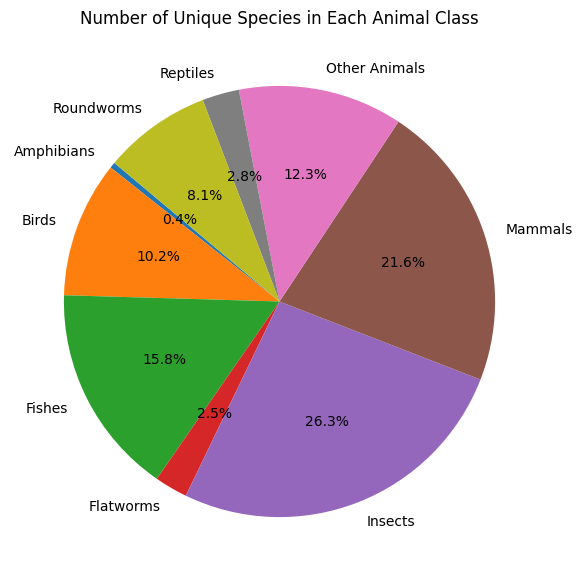

In [39]:
#Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5

print(new_dataframe)
# euk['Species_New'] = euk['Species'].str.split().str[0:2].str.join(" ")
filtered_df_new = new_dataframe[new_dataframe['Kingdom'] == 'Animals']

unique_count_updated = filtered_df_new.groupby('Class')['Species_New'].nunique().reset_index()
unique_count_updated.columns = ['unique_class_for_animals', 'Unique_Species_foreach_class']

# Display the result
print(unique_count_updated)



plt.figure(figsize=(10, 7))
unique_count_updated.set_index('unique_class_for_animals')['Unique_Species_foreach_class'].plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    figsize=(10, 7)
)
plt.title('Number of Unique Species in Each Animal Class')
plt.ylabel('')  # Hide the y-label
plt.show()